# **Automatidata Project**

1. [To 00_Company Background](#section_00)
2. [To 01_Identify Data Types and Relevant Variables Using Python](#section_01)
3. [To 02_Exploratory Data Analysis (EDA)](#section_02)
4. [To 03_Statistical Analysis](#section_03)
5. [To 04_Build a Multiple Linear Regression Model](#section_04)
6. [To 05_XXX](#section_05)

#### **00_Company Background** <a id='section_00'></a>

Automatidata works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client’s business needs and utilizing their data to meet those business needs. 

Automatidata is consulting for the *New York City Taxi and Limousine Commission (TLC)*. New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency has partnered with Automatidata to `develop a regression model that helps estimate taxi fares before the ride`, based on data that TLC has gathered.

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~ ~ ~ 

#### **01_Identify Data Types and Relevant Variables Using Python** <a id='section_01'></a>
1. Understand the situation
    - Understand stakeholder request and mission
    - Understand provided taxi cab dataset and information
2. Understand the data
    - Create dataframe and prepare for Exploratory Data Analysis (EDA) activity
    - Inspect the data
3. Understand the variables
    - Use insights from the examination of the summary data to guide deeper investigation into specific variablesay.

In [298]:
# Import libraries
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
import datetime as dt
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for A/B testing, OLS, MLR, confusion matrix
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error




df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [182]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [184]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


4. Observations:
   - No null values with 2 non-numeric values. They are `datetime`.
   - The distribution of `fare_amount` is worth to consider as the `min` is `-120` which is negative; not possible in reality.
   - The distribution of `trip_distance` also needs to be investigated as the `75%` of the ride is between 1-3 miles but the `max` is `33.96`.

5. Investigate more on `total_amount` and `trip_distance`, and other variables to find the most likely variables to help build a predictive model.

In [185]:
# Sort the data by trip distance from maximum to minimum value
trip_distance_sorted = df.sort_values(by = ['trip_distance'], ascending = False)[['trip_distance','total_amount']]
trip_distance_sorted.head(10)

,trip_distance,total_amount
9280,33.96,150.30
13861,33.92,258.21
6064,32.72,179.06
10291,31.95,131.80
29,30.83,111.38
18130,30.50,119.31
5792,30.33,73.20
15350,28.23,62.96
10302,28.20,70.27
2592,27.97,63.06


In [186]:
# Sort the data by total amount
total_amount_sorted = df.sort_values(by = ['total_amount'], ascending = False)[['total_amount', 'trip_distance']]
total_amount_sorted.head(10)

,total_amount,trip_distance
8476,1200.29,2.60
20312,450.30,0.00
13861,258.21,33.92
12511,233.74,0.00
15474,211.80,0.00
6064,179.06,32.72
16379,157.06,25.50
3582,152.30,7.30
11269,151.82,0.00
9280,150.30,33.96


In [187]:
# Sort the data by total amount
total_amount_sorted.tail(10)

,total_amount,trip_distance
5448,-4.3,0.25
4423,-4.3,0.06
10281,-4.3,0.00
8204,-4.8,0.41
20317,-4.8,0.24
11204,-5.3,0.64
14714,-5.3,0.40
17602,-5.8,0.46
20698,-5.8,0.70
12944,-120.3,0.17


In [188]:
# Discover the number of each payment type in the data
df['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

`payment_type`:
A numeric code signifying how the passenger paid for the trip:
- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip

In [189]:
# Find the average tip for trips paid with credit card
avg_cc_tip = df[df['payment_type'] == 1]['tip_amount'].mean()
print('Average tip for trips paid with card credit is', avg_cc_tip)

# Find the average tip for trips paid with cash
avg_cash_tip = df[df['payment_type'] == 2]['tip_amount'].mean()
print('Average tip for trips paid with card credit is', avg_cash_tip)

Average tip for trips paid with card credit is 2.7298001965280054
Average tip for trips paid with card credit is 0.0


In [190]:
# How many times is each vendor ID represented in the data?
df['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [191]:
# Filter the data for credit card payments only
credit_card = df[df['payment_type'] == 1]

# Filter the data for passenger count only
credit_card['passenger_count'].value_counts()

passenger_count
1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: count, dtype: int64

In [192]:
# Calculate the average tip amount for each passenger count (credit card payments only)
credit_card.groupby(['passenger_count']).mean(numeric_only = True)['tip_amount']


passenger_count
0    2.610370
1    2.714681
2    2.829949
3    2.726800
4    2.607753
5    2.762645
6    2.643326
Name: tip_amount, dtype: float64

6. After looking at the dataset, the variables that are most likely contribute to the predictive model build for taxi fare estimation are `total_amount` and `trip_distance`. This is due to the obvious visible trend after considering removing the possible error and outliers such as `tip_distance = 0 with total_amount > 0`.

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~ ~ ~ 

#### **02_Exploratory Data Analysis (EDA)** <a id='section_02'></a>
1. Data Visualization
    - Identify the presence of outliers on relevant columns
    - Identify any trends or insight

**(1/n) We will start analyze `trip_distance`, `total_amount`, `tip_amount` and `passenger_count`:**

In [193]:
# Convert data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Check whether the Dtype for these 2 columns have changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

`trip_distance` Column:

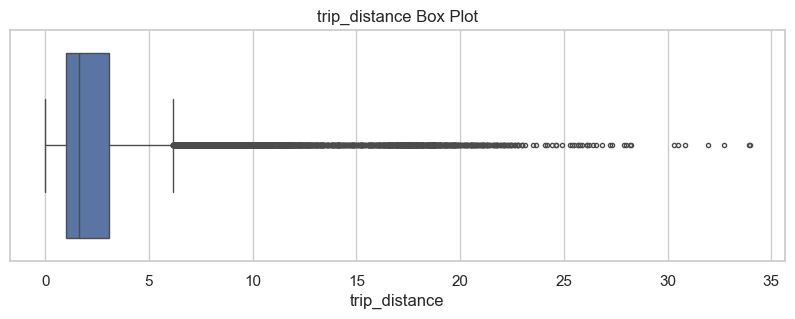

In [194]:
# Create box plot of trip_distance
plt.figure(figsize = (10, 3))
sns.boxplot(data = None, x = df['trip_distance'], fliersize = 3)
plt.title('trip_distance Box Plot');

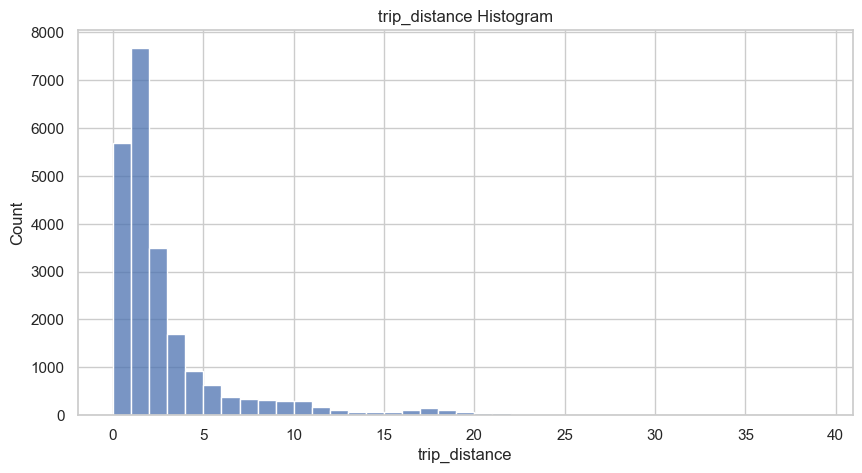

In [195]:
# Create histogram of trip_distance
plt.figure(figsize = (10, 5))
sns.histplot(df['trip_distance'], bins=range(0, 40, 1))
plt.title('trip_distance Histogram');

`trip_distance` Observation:
- Most of the journeys take are less than 3 miles
- Number of trips falls away steeply as the distance traveled increase

`total_amount` Column:

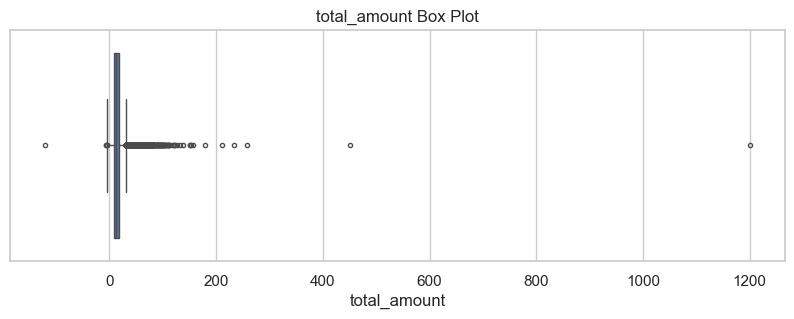

In [196]:
# Create box plot of total_amount
plt.figure(figsize = (10, 3))
sns.boxplot(data = None, x = df['total_amount'], fliersize = 3)
plt.title('total_amount Box Plot');

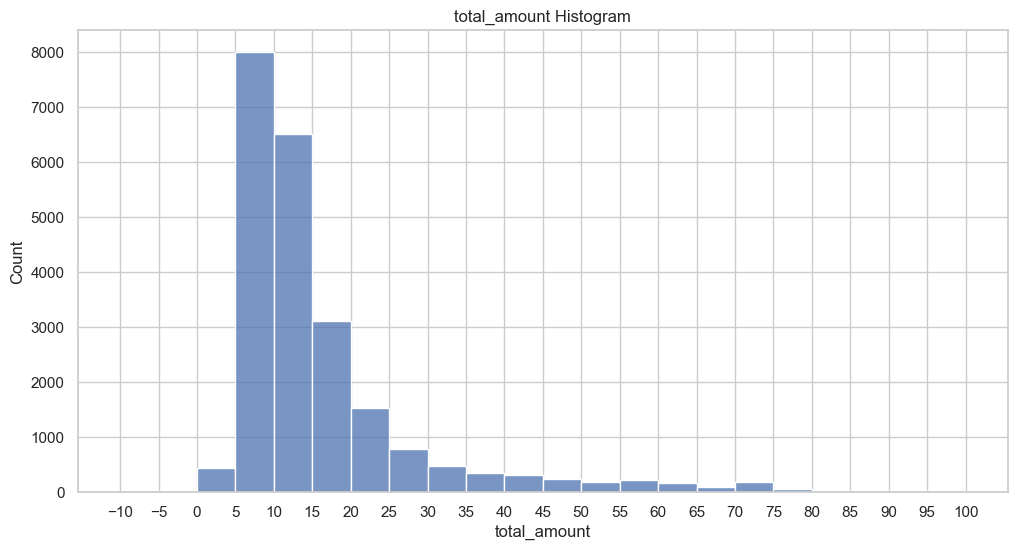

In [197]:
# Create histogram of total_amount
plt.figure(figsize = (12, 6))
ax = sns.histplot(df['total_amount'], bins=range(-10, 101, 5))
ax.set_xticks(range(-10, 101, 5))
plt.title('total_amount Histogram');

`total_amount` Observation:
- Most of the trips fall between \\$5.00 to \\$15.00
- Overall, the total amount of each trip has a distribution that skews to the right
- In other words, the mode will fall on the left, following by the median and the mean to the right

`tip_amount` Column:

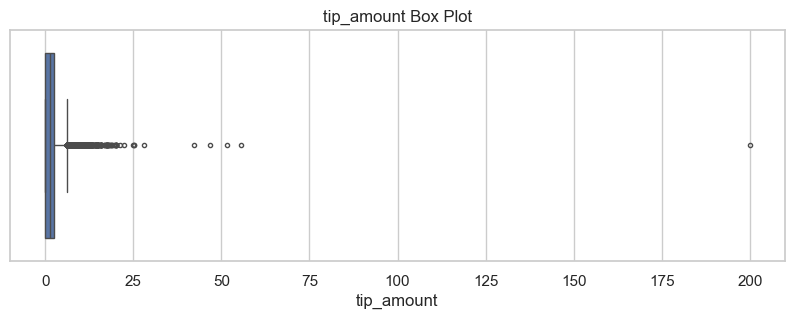

In [198]:
# Create box plot of tip_amount
plt.figure(figsize = (10, 3))
sns.boxplot(data = None, x = df['tip_amount'], fliersize = 3)
plt.title('tip_amount Box Plot');

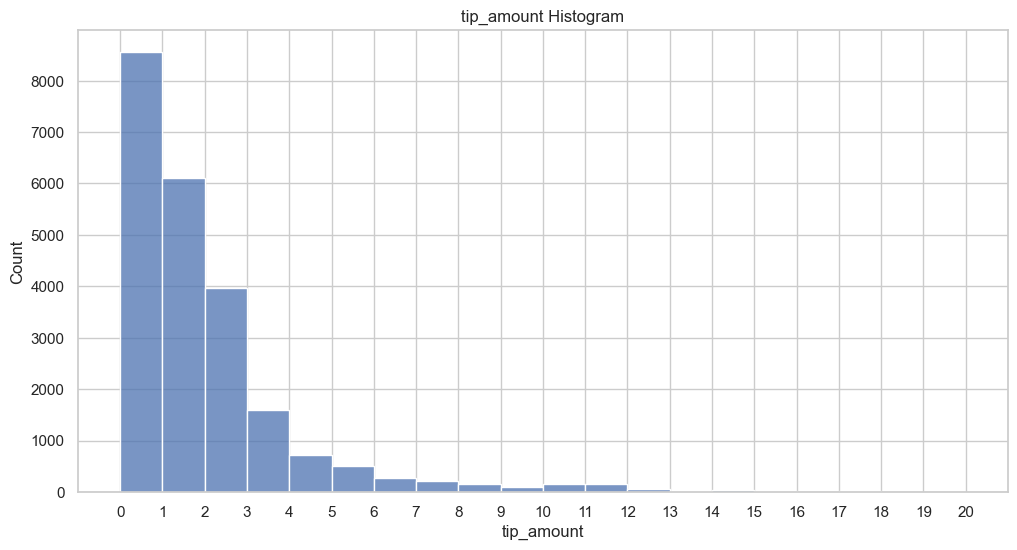

In [199]:
# Create histogram of tip_amount
plt.figure(figsize = (12, 6))
ax = sns.histplot(df['tip_amount'], bins=range(0, 21, 1))
ax.set_xticks(range(0, 21, 1))
plt.title('tip_amount Histogram');

`tip_amount` Observation:
- Most of the tips given by the riders fall between \\$0.00 to \\$3.00
- Overall, the tip amount has a distribution that skews to the right

`tip_amount` Column by `VendorID`:

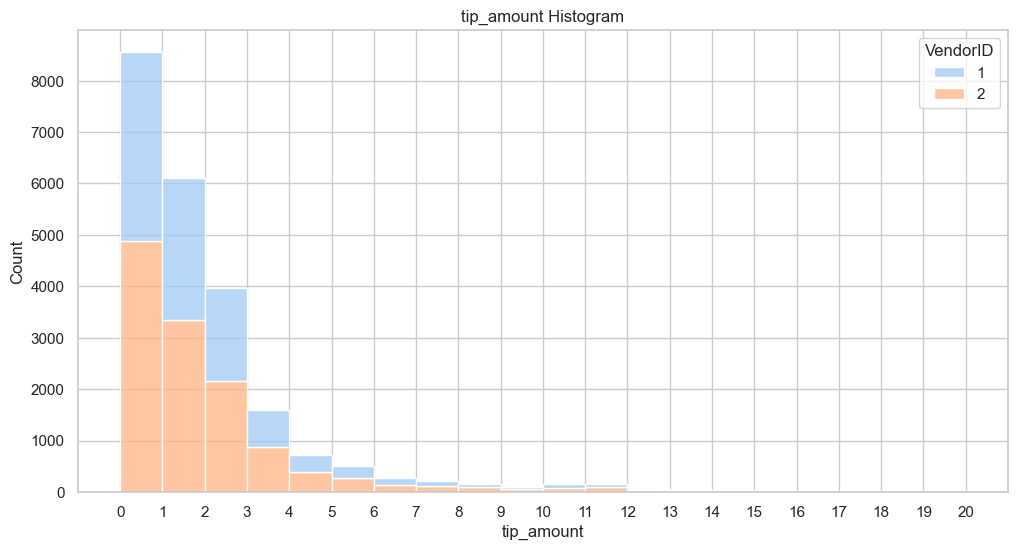

In [200]:
# Create histogram of tip_amount by vendor
plt.figure(figsize = (12, 6))
ax = sns.histplot(data = df, x = 'tip_amount', bins=range(0, 21, 1), hue = 'VendorID',
                 multiple = 'stack', palette = 'pastel')
ax.set_xticks(range(0, 21, 1))
plt.title('tip_amount Histogram');

`tip_amount` Column by `VendorID` Observation:
- There is no obvious or significant and noticeable trends / distribution of tips amount between the 2 vendors in the dataset

`tip_amount` > $10  Column by `VendorID`:

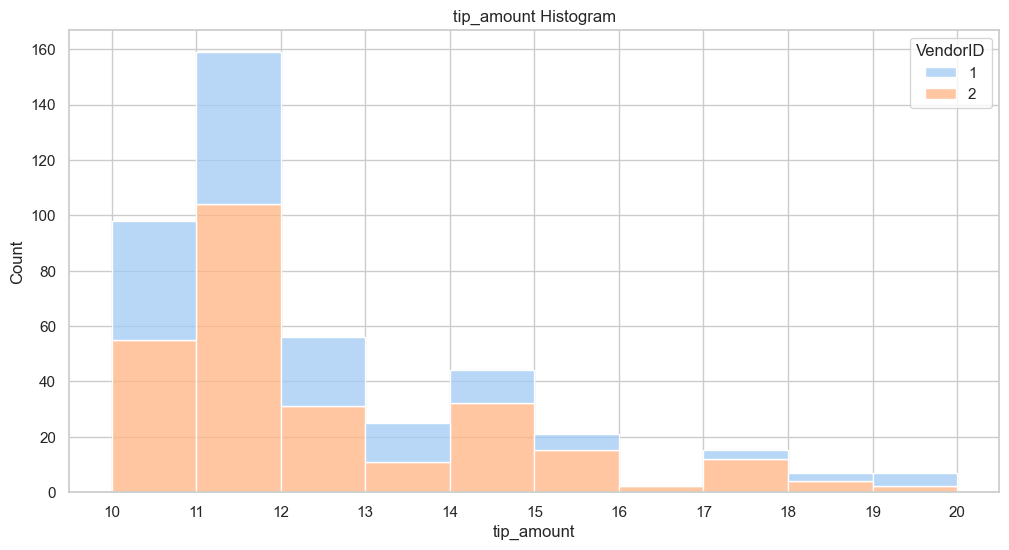

In [201]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] >10]
plt.figure(figsize = (12, 6))
ax = sns.histplot(data = tips_over_ten, x = 'tip_amount', bins=range(10, 21, 1), hue = 'VendorID',
                 multiple = 'stack', palette = 'pastel')
ax.set_xticks(range(10, 21, 1))
plt.title('tip_amount Histogram');

`tip_amount` > $10  Column by `VendorID` Observation:
- Again, there is not much difference between the 2 vendors even at this region

Mean `tip_amount` by `passenger_count` column:

In [202]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

Observation: 
- 2/3 of the rides are single occupancy with 16,117 rides
- The rides with 6 occupancies (the maximum) has around 700 rides
- The lowest rides count is 33 with 0 passenger count which does not make sense at all unless there is a certain reason behind it

In [203]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean(numeric_only = True)[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


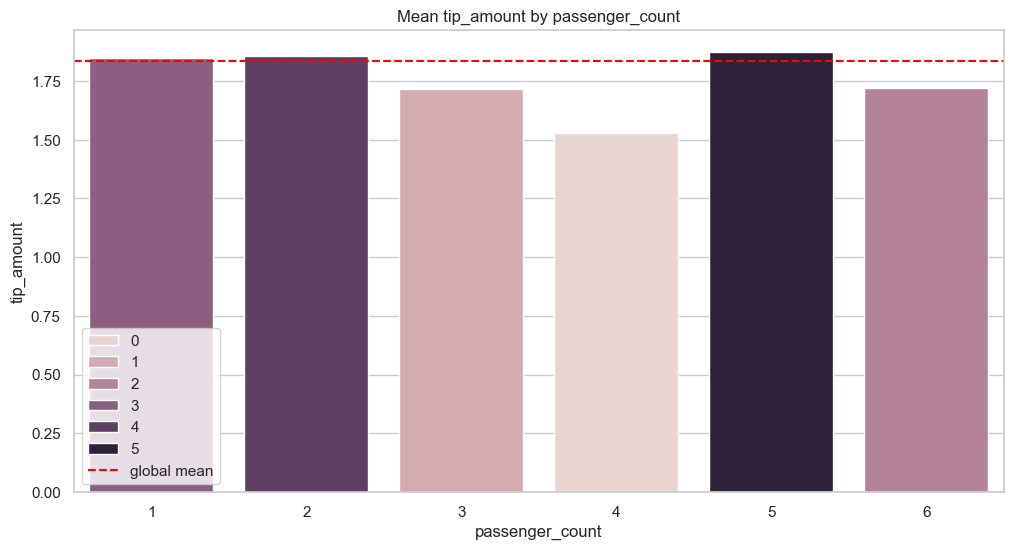

In [204]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette('Blues_d', len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize = (12, 6))
ax = sns.barplot(y = data['tip_amount'], x = data.index, hue = rank)
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip_amount by passenger_count');

Observation:
- Aside from 0 passengers, the trend for the mean tip amount by the passenger count is not obvious and varies very little
- Although the mean tip for 4-passenger rides drop significantly, overal trend is not visible in this case

**(2/n) Let's continue our EDA by calculating total ride count and revenue:**

In [205]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

# Observe the change
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday


In [206]:
# Begin by calculating total number of rides for each month
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides.head(10)

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
Name: count, dtype: int64

In [207]:
# Re-order the monthly ride list
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index = month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

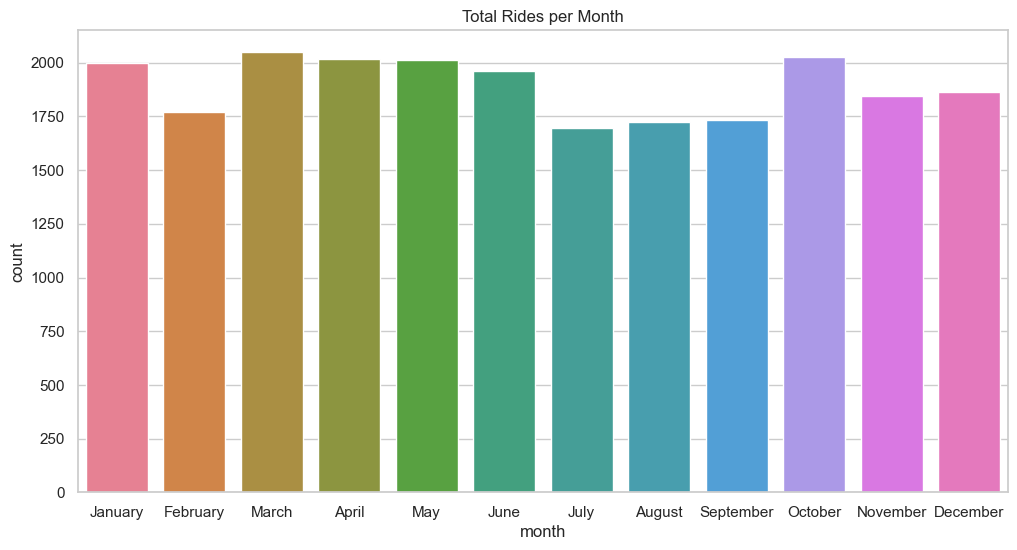

In [208]:
# Create a bar plot of total rides per month
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = monthly_rides.index, y = monthly_rides, hue = monthly_rides.index)
plt.title('Total Rides per Month');

Observation:
- Monthly rides are consistent except notable dips in July - September with possible reason of summer season (hot weather)
- This happens also in February except the reason might be not due to the hot temperature

In [209]:
# Repeat the above process, this time for rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index = day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

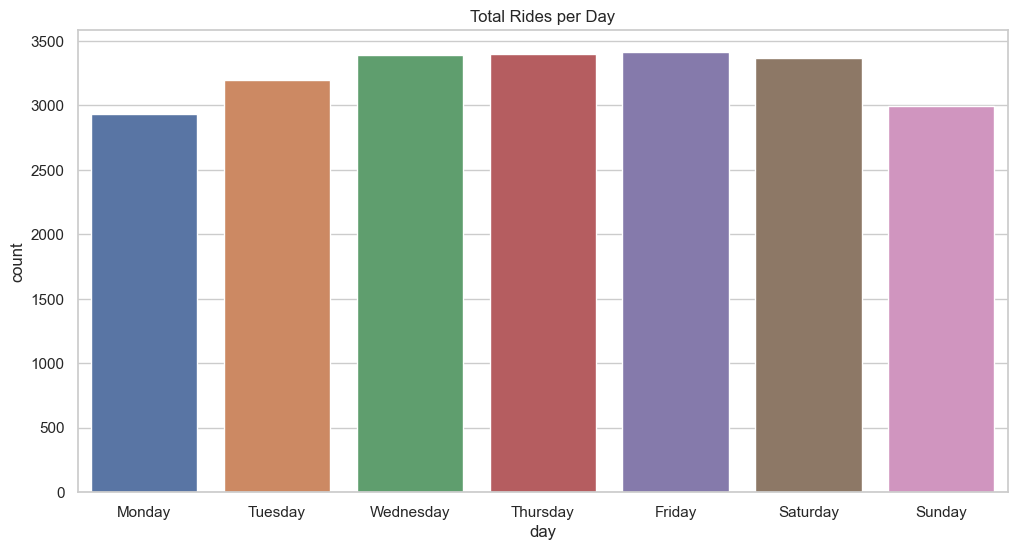

In [210]:
# Create bar plot for ride count by day
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = daily_rides.index, y = daily_rides, hue = daily_rides.index)
plt.title('Total Rides per Day');

Observation:
- Daily rides are consistent except notable dips on Sunday, Monday and Tuesday
- Surprisingly, the total number of rides on Sunday is lower

In [211]:
# Repeat the process, this time for total revenue by day
total_amount_day = df.groupby('day').sum(numeric_only = True)['total_amount']
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64

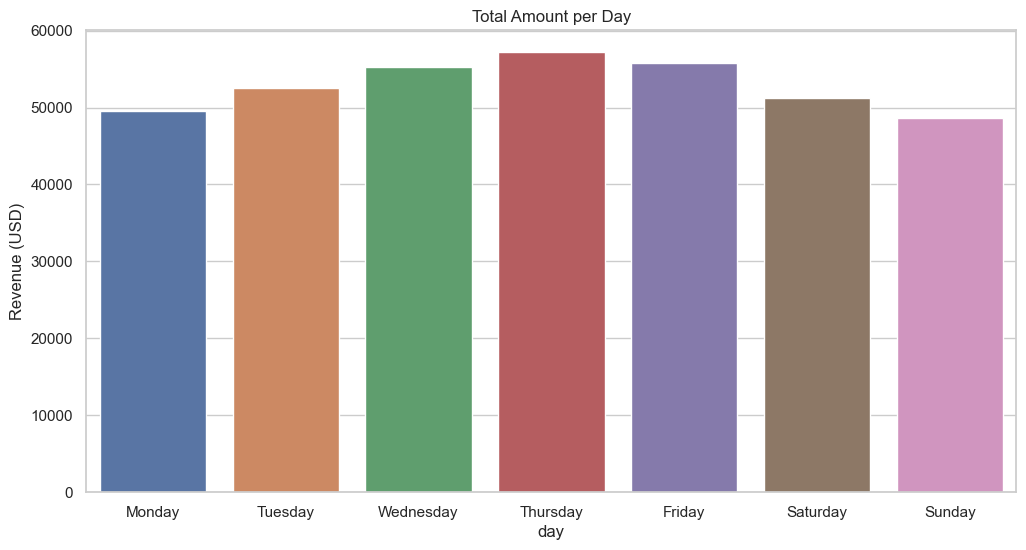

In [212]:
# Create bar plot of total revenue by day
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = total_amount_day.index, y = total_amount_day, hue = total_amount_day.index)
ax.set_ylabel('Revenue (USD)')
plt.title('Total Amount per Day');

Observation:
- Thursday has the highest gross revenue of all days
- Sunday and Monday have the least revenue
- Interestingly, Saturday has only 35 fewer rides than Thursday but the revenue drop approximately 10% than Thursday's revenue

In [213]:
# Repeat the process, this time for total revenue by month
total_amount_month = df.groupby('month').sum(numeric_only = True)['total_amount']
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

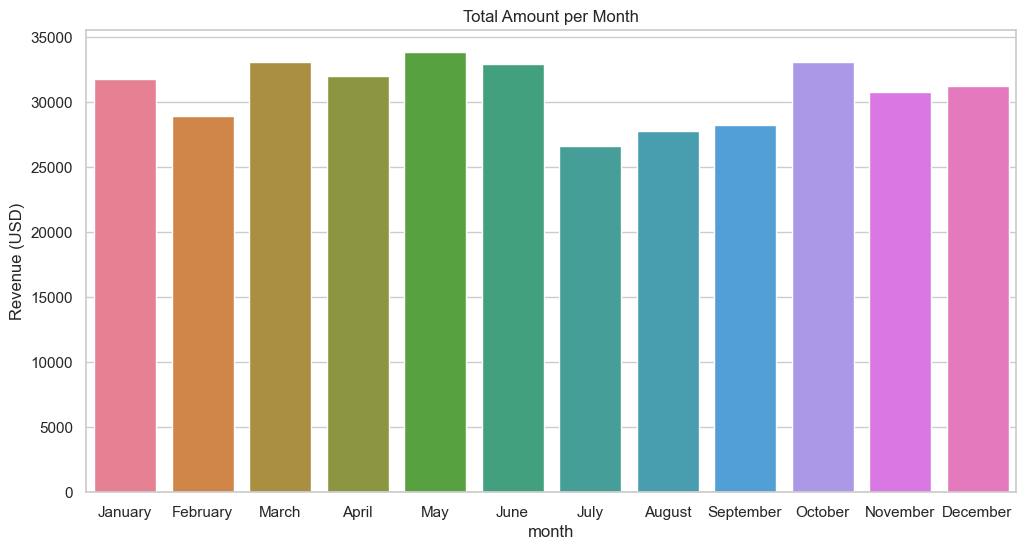

In [214]:
# Create a bar plot of total revenue by month
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = total_amount_month.index, y = total_amount_month, hue = total_amount_month.index)
ax.set_ylabel('Revenue (USD)')
plt.title('Total Amount per Month');

Observation:
- Unlike previous total revenue per day, monthly revenue generally follows the pattern of total monthly rides where the number of rides are lower in July - September
- This is also happens in February where a slight dip in that month

The below image is created by using `Tableau Public`, which can be easier to manipulate and present. From the image, we could almost see a clear straight line from the origin.

<img src="Tableau.jpg">

**(n/n) Next, we continue our EDA by plotting mean `trip_distance` by drop-off location and histogram of rides by drop-off location:**

In [215]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [216]:
# Calculate the mean trip distance for each drop-off location
mean_distance_by_dropoff = df.groupby('DOLocationID').mean(numeric_only = True)['trip_distance']

# Sort the results in ascending order by mean trip distance
mean_distance_by_dropoff = mean_distance_by_dropoff.sort_values(ascending = True)
mean_distance_by_dropoff

DOLocationID
207     1.200000
193     1.390556
237     1.555494
234     1.727806
137     1.818852
         ...    
51     17.310000
11     17.945000
210    20.500000
29     21.650000
23     24.275000
Name: trip_distance, Length: 216, dtype: float64

C:\Users\r14fadhli\AppData\Local\Temp\ipykernel_27792\1722848791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = mean_distance_by_dropoff.index, y = mean_distance_by_dropoff, order = mean_distance_by_dropoff.index, palette='rainbow')


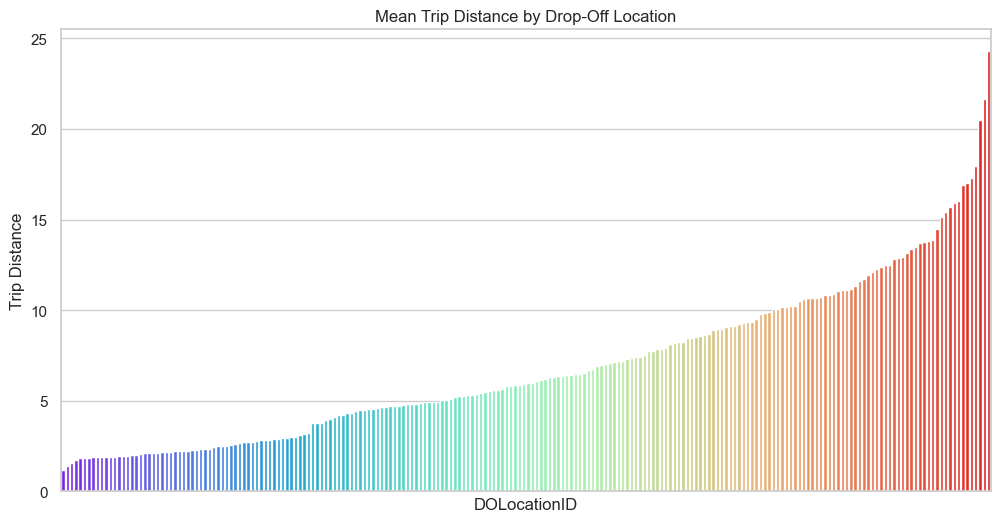

In [217]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = mean_distance_by_dropoff.index, y = mean_distance_by_dropoff, order = mean_distance_by_dropoff.index, palette='rainbow')
ax.set_ylabel('Trip Distance')
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean Trip Distance by Drop-Off Location');

Observation:
- This plot presents a characteristic curve related to the cumulative density function of a normal distribution
- In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain
- This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations

In [218]:
# Check if all drop-off locations are consecutively numbered
print(df['DOLocationID'].max())
print(len(set(df['DOLocationID'])))

print(df['DOLocationID'].max() - len(set(df['DOLocationID'])))

265
216
49


There are 49 numbers that do not represent a drop-off location.

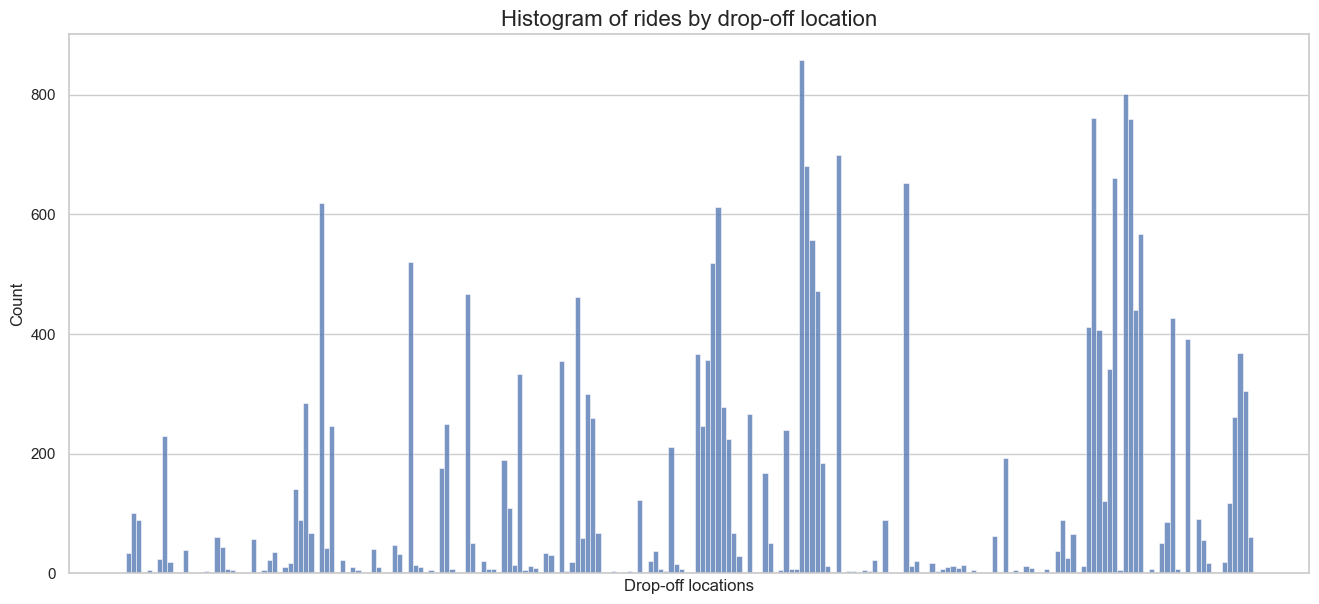

In [219]:
# Eliminate the spaces in the historgram that these missing numbers
plt.figure(figsize=(16,7))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(data = sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

Observation:
- Some locations have more tha 200+ drop-off locations
- Some other locations have relatively few trips
- This might be due to some tourist spots at certain location which cause the high-traffic
- However, it would be helpful to know the location that each ID corresponds with but unfortunately, this is not in the data

In [220]:
# Add 'trip_duration'into the dataset
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,16.716667
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,8.000000
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,59.633333
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,21.983333
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,12.116667
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,20.433333


2. Insight Gained and Discussion
    - There are no missing values in the dataset but the outliers occur in total_amount and trip_distance can be considered as extreme
    - There are outliers up to 35 miles for trip_distance
    - There are total_amount with negative values up to \$1,200 which make no sense at all
    - The highest distribution of trip distances are below 5 miles
    - During summer, the total rides are lower
    - There are several trips that have a trip_distance of \$0 --> Would this data impact our model?

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~ ~ ~ 

#### **03_Statistical Analysis** <a id='section_03'></a>
1. Conduct A/B Testing
    - Apply descriptive statistics and hypothesis testing
    - Sample data and analyze whether there is a relationship between variables

**(1/n) Prepare for A/B testing between `payment_type` and `fare_amount`:**

Note: In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown

In [221]:
# descriptive stats code for EDA
df.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699,22699,22699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,7,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,Friday,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2049,3413,NaN
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,NaN,NaN,17.013777
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,NaN,NaN,-16.983333
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,NaN,NaN,6.650000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,NaN,NaN,11.183333
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,NaN,NaN,18.383333
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,NaN,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,NaN,NaN,1439.550000


In [222]:
# Find out the average fare amount for each payment type
df.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

Based on the above calculation:
- Payment_type = 1 (Credit Card) has higher number of fare_amount compare to the other payment_type
- Payment_type = 4 (Dispute) has the lower number of fare_amount

However, this difference might arise from random sampling, rather than being a true difference in fare amount. 

To assess whether the difference is statistically significant, hypothesis test is conducted.

**(2/n) Conduct A/B testing to analyze whether there is a relationship between `payment_type` and `fare_amount`:**

Hyphothesis Testing:
1.   Null hypothesis and the alternative hypothesis

        - Null Hypothesis $H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

        - Alternative Hypothesis $H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.
2.   Signficance level

        - 5% as the significance level with two-sample t-test.

In [223]:
# Hypothesis test, A/B test
# Significance level

credit_card = df[df['payment_type'] == 1]['fare_amount']
cash = df[df['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

Ttest_indResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12)

Results:

1. p-value = 6.797387473030518e-12
        - Since the p-value is significantly smaller than the significance level of 5%, **the null hypothesis is rejected**
   
3. Conclusion: There is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash

**(3/n) Business insight or business opportunity from the A/B testing result (relationship between `payment_type` and `fare_amount`):**

Business insight that we can get from the A/B testing:
- Customers who pay with credit card tend to generate more revenue
- Do customers who pay with credit card tend to use physical card or via phone (NFC etc.)?
- Is it OK to proceed with the campaign on encouraging the customers to use more cashless payment to gain more revenue?

**(4/n) Prepare for A/B testing between `VendorID` and `tip_amount`:**

Note: `VendorID` indicates the below agency:  

1= Creative Mobile Technologies, LLC; 

2= VeriFone Inc.

Meanwhile, `tip_amount` is automatically populated for credit card tips. Cash tips are not included.

In this case, we will to conduct A/B testing to investigate whether `VendorID` would effect the number of collected `tip_amount` or not


In [224]:
# Find out the average fare amount for each trip distance
df.groupby('VendorID')['tip_amount'].mean()

VendorID
1    1.83725
2    1.83461
Name: tip_amount, dtype: float64

**(5/n) Conduct A/B testing to analyze whether there is a relationship between `VendorID` and `tip_amount`:**

Hyphothesis Testing:
1.   Null hypothesis and the alternative hypothesis

        - Null Hypothesis $H_0$: There is no difference in the average tip amount collected between Creative Mobile Technologies, LLC and VeriFone Inc.

        - Alternative Hypothesis $H_A$: There is a difference in the average tip amount between Creative Mobile Technologies, LLC and VeriFone Inc.
2.   Signficance level

        - 5% as the significance level with two-sample t-test.

In [225]:
# Hypothesis test, A/B test
# Significance level

vendor_CMT = df[df['VendorID'] == 1]['tip_amount']
vendor_VF = df[df['VendorID'] == 2]['tip_amount']
stats.ttest_ind(a=vendor_CMT, b=vendor_VF, equal_var=False)

Ttest_indResult(statistic=0.06916190147016749, pvalue=0.9448614560353986)

Results:

1. p-value = 0.9448614560353986- Since the p-value is significantly higher than the significance level of 5%, **fail to reject the null hypothesis**
   
3. Conclusion: There is a no statistically significant difference in the average tip amount collected between Creative Mobile Technologies, LLC and VeriFone Inc

**(n/n) Business insight or business opportunity from the A/B testing result (relationship between `VendorID` and `tip_amount`):**

Business insight that we can get from the A/B testing:
- Both vendors collect the same amount of tip
- We could say that customers who use Creative Mobile Technologies agency would pay the same amount of tip if the same customers use VeriFone Inc agency; showing that both drivers and taxi conditions from both vendors are equal

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~ ~ ~ 

#### **04_Build a Multiple Linear Regression Model** <a id='section_04'></a>

1. EDA & checking model assumption
    - Outliers and extreme data values can significantly impact linear regression equations
    - After visualizing data, some of the outliers have to be either dropped, substituted or completely removed
    - Feature engineering to create a new useful variable as predictor variable

In [226]:
# Display the dataset's shape
print(df.shape)

# Display basic info about the dataset
df.info()

(22699, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64  

In [227]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
# Check for duplicates
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Shape of dataframe: (22699, 21)
Shape of dataframe with duplicates dropped: (22699, 21)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
month                    0
day                      0
trip_duration            0
dtype: int64

In [228]:
# Display descriptive stats about the data
df.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482


Observation:
- It is very clear that outlier can be seen at `tip_amount = $200`
- The same thing is also at `total_amount = $1,200`
- Meanwhile the `mta_tax` shows  a constant value throughout the data which imply that it would not be suitable as predictive element

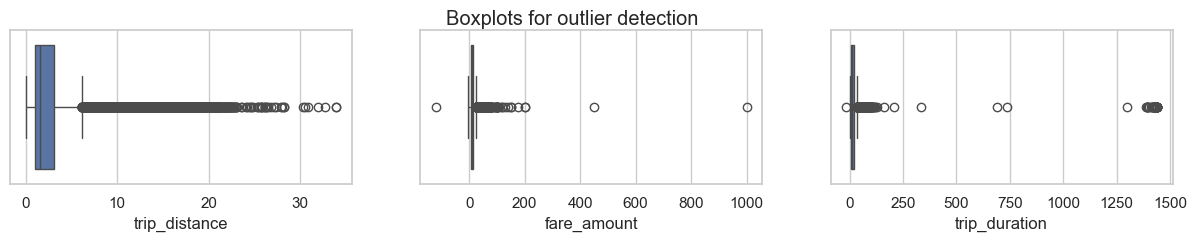

In [229]:
# Plot a box plot for each feature: trip_distance, fare_amount, duration.
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['trip_duration'])
plt.show();

Observation:
- All 3 variables contain obvious outliers
- The values for `fare_amount` and `trip_duration` definitely seem to have problematic outliers on the higher end side
- Since the joruney from the southern tip of Staten Island to the Manhattan is around 30 miles, `trip_distance` variable looks find and reasonable; can be considered as not an error

<div style="text-align: center;">
    <img src="Staten Island - Manhattan.jpg" alt="Staten Island - Manhattan">
</div>

**(1/n) `trip_distance` outliers:**

From the data visualization above, we could observe that some of the `trip_distance` values are `0`. 
Are these reflective of errorneous data or just a value which is rounded down?

In [230]:
# To check this, sort the column values, eliminate duplicates, and inspect the least 10 values
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The `trip_distance` data is captured with high degree of precision. For example, 0.01 mile is almost equal to 16 metre. It is ridiculous way for passenger to use taxi for only this short distance. However, it might be possible for trips to have distances of zero if a passenger called a taxi and then changed their mind. 

Besides, are there enough zero values in the data to pose a problem?

In [231]:
# Calculate the count of rides where the trip_distance is zero
sum(df['trip_distance'] == 0)

148

148 out of ~23,000 rides is relatively insignificant. It is almost 0.64% from total rides. You could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the `trip_distance` column will remain untouched with regard to outliers.

**(2/n) `fare_amount` outliers:**

Let us observe the `fare_amount` variable first

In [232]:
# Observe fare_amount data
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Observation:

The range of values in the `fare_amount` column is large and the extreme don't make sense. For example, the `fare_amount` with negative value is totally error.
- **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

- **High values:** The maximum fare amount in this dataset is nearly \\$1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is \\$8. The standard formula of `Q3 + (1.5 * IQR)` yields \$26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a cap of $62.50.

In [233]:
# Calculate the number of values with less than $0
print(len(df[df['fare_amount'] < 0]))

# Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0

df['fare_amount'].min()

14


0.0

In [234]:
# Impute the maximum value as Q3 + (6 * IQR)
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [235]:
# Remove outliers which lie more than the upper threshold value
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



**(3/n) `trip_duration` outliers:**

Next, we proceed with `trip_duration` variable.

In [236]:
# Observe trip_duration data
df['trip_duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: trip_duration, dtype: float64

Observation:

The range of values in the `trip_duration` consist of negative value and up to ~1400 minutes
- **Low values:** Negative values are problematic. The `trip_duration` of a ride should not be `0`

- **High values:** Impute high values the same way we imputed high-end outliers for `fare_amount: Q3 + (6 * IQR)`.

In [237]:
# Calculate the number of values with less than $0
print(len(df[df['trip_duration'] < 0]))

# Impute a 0 for any negative values
df.loc[df['trip_duration'] < 0, 'trip_duration'] = 0
df['trip_duration'].min()

1


0.0

In [238]:
# Impute the high outliers
outlier_imputer(['trip_duration'], 6)

trip_duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: trip_duration, dtype: float64



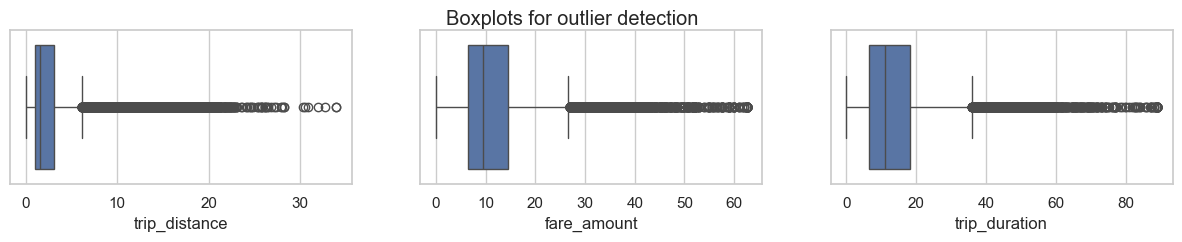

In [239]:
# Re-examine the box for each feature: trip_distance, fare_amount, duration.
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['trip_duration'])
plt.show();

**(4/n) Feature engineering of `mean_distance`:**

When deployed, the model will not know the `trip_duration` of a trip until after the trip occurs. In this case, we cannot train a model uses this feature. However, we can use the statistics of trips we do know to generalize about ones we do not know.

Hence, in this step, we create new `mean_distance` column that will provide us information about the mean distance for each group of trips that share the same pickup and dropoff points.

Note that the trip from C to D is different with D to C in this case. All trips that share a unique pair of start and end points get grouped and averaged. Then, the value will be inserted in `mean_distance` column.

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |



Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row. This is done by converting those columns to string and join them, seperated by a space. 

So the new column would look like below:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |

In [240]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(10)

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
5    161 236
6     79 241
7    237 114
8    234 249
9    239 237
Name: pickup_dropoff, dtype: object

In [241]:
# Compute the mean, and capture the values only in the trip_distance column
grouped = df.groupby('pickup_dropoff').mean(numeric_only = True)[['trip_distance']]
grouped.head(10)

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
100 113,2.024000
100 114,1.940000
100 12,4.550000
100 125,2.840000


In [242]:
# Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [243]:
# Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


**(5/n) Feature engineering of `mean_duration`:**

Repeat the process to create `mean_duration` column

In [244]:
grouped2 = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_duration']]
grouped2

# Convert `grouped` to a dictionary
grouped2_dict = grouped2.to_dict()
# Reassign to only contain the inner dictionary
grouped2_dict = grouped2_dict['trip_duration']

# Map `grouped2_dict` to the `mean_distance` column
df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped2_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


**(6/n) Feature engineering of `rush_hour`:**

Repeat the process to create `rush_hour` column

In [245]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,mar,saturday,14.066667,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,apr,tuesday,26.500000,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,dec,friday,7.200000,262 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,may,sunday,30.250000,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,apr,saturday,16.716667,4 112,4.435000,14.616667
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,mar,saturday,8.000000,161 236,2.052258,11.855376
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,may,wednesday,59.633333,79 241,12.830000,59.633333
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,aug,tuesday,21.983333,237 114,4.022500,26.437500
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,feb,saturday,12.116667,234 249,1.019259,7.873457
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,nov,friday,20.433333,239 237,1.580000,10.541111


We define rush hour as:
- Any weekday (not Saturday or Sundday) AND
- Either from 06:00 - 10:00 or from 16:00 - 20:00

Create a binary `rush_hour` column that contains `1` if the ride was during the rush hour and `0` if it was not

In [246]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [247]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [248]:
# Apply the `rush_hourizer()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,mar,saturday,14.066667,100 231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,apr,tuesday,26.500000,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,dec,friday,7.200000,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,may,sunday,30.250000,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,apr,saturday,16.716667,4 112,4.435000,14.616667,0


**(n/n) Visualize the relationship between `mean_duration` and `fare_amount`:**

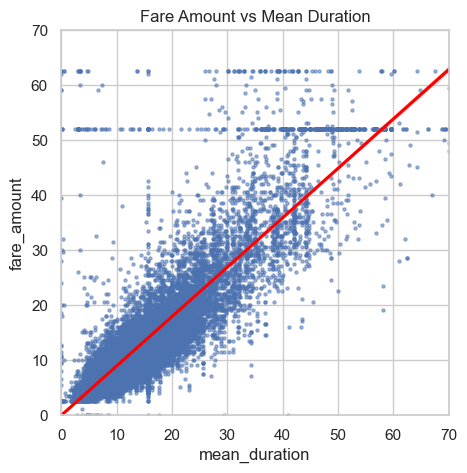

In [249]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure(figsize = (5, 5))
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Fare Amount vs Mean Duration')
plt.show()

Observation:
- There is a clear stright horizontal line can be see at around `fare_amount` =  52 and 63
- There are cases where the `fare_amount` is fix eventhough the `mean_duration` is not fix

In [250]:
# Check the value of the rides in the second horizontal line in the scatter plot
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

In [251]:
# Examine the first 30 of these $52 trips
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,mar,sunday,36.800000,236 132,19.211667,40.500000,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,jun,saturday,66.850000,132 163,19.229000,52.941667,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,nov,saturday,0.966667,132 132,2.255862,3.021839,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,dec,wednesday,29.183333,132 79,19.431667,47.275000,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,sep,sunday,29.483333,132 234,17.654000,49.833333,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,feb,tuesday,39.833333,132 48,18.761905,58.246032,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,jun,monday,15.616667,228 88,4.730000,15.616667,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,aug,thursday,45.450000,132 48,18.761905,58.246032,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,sep,tuesday,42.850000,186 132,17.096000,42.920000,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,apr,sunday,71.583333,132 148,17.994286,46.340476,0


Observation:
- From the above rows, we could observe that most of these rides involve `PULocationID` = 132 or `DOLocationID` = 132
- The `RatecodeID` is same which is `2` eventhough the `trip_distance` is different
- According to the data dictionary of this dataset, `RatecodeID` = 2 indicates trips for JFK, which is referring to John F. Kennedy International Airport
- This would mean that the possibility of the rate for these trips are fixed is very high

2. Model building and evaluation
    - Drop features that are redundant, irrelevant, or that will not be available in a deployed environment
    - Visualize the data by utilyzing `pair plot`, `correlation matrix` and `heatmap`
    - Split data into outcome variable and features
    - Evaluate model performance by calculating residual sum of squares (RSS)

In [252]:
# Re-observe the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [253]:
# Duplicate to preserve the original clean dataset
df2 = df.copy()

# Drop the unrelated features
df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'trip_duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

# Observe the new df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


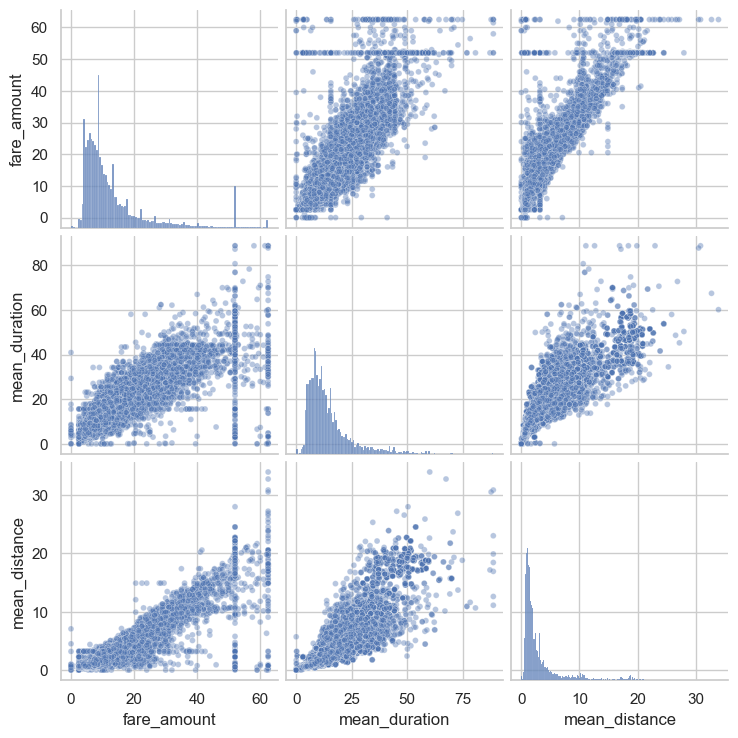

In [254]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']], plot_kws={'alpha':0.4, 'size':5},);

Observations:
- Clear linear correlation can be seen with each other

In [255]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


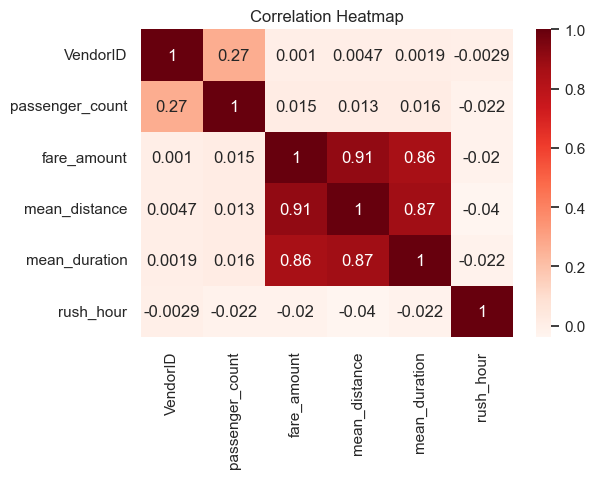

In [256]:
# Create correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

Observation:
- `mean_duration` and `mean_distance` are both highly correlated with the target variable `fare_amount`
- Also, `mean_duration` and `mean_distance` are both correlated with each other with a Person correlation of 0.87
- Highly correlated predictor variables can be bad for linear regression models when we want to be able to draw statistical inferences about the data from the model
- However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about the data


In [258]:
# Re-observe the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [266]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [267]:
# Dummy encode categorical variables
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first = True, dtype = int)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [268]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [269]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.8694684   0.17616665 -0.64893329  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.54099045  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.64893329 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.54099045 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.64893329  0.89286563]]


In [270]:
# Instantiate model to the training data
# Fit the model to the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [271]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.186666416775414
MSE: 17.889732963492683
RMSE: 4.229625629236314


In [273]:
# Calculate the same metrics on the test data
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [274]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593864
MSE: 14.326454156998945
RMSE: 3.785030271609323


Observation:
- The model performance is high on both training and test sets
- R<sup>2</sup> for the test data is 0.868. This means that 86.8% of the variance in the `fare_amount` variable is described by the model
- MAE value is 2.13 for the test data. This means that on average, the model's predictions are off by approximately 2.1337 units from the actual values

3. Interpreting Model Results

In [311]:
# Create a `results` dataframe
results = pd.DataFrame(data = {'actual': y_test['fare_amount'], 'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head(10)

,actual,predicted,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408
308,23.5,20.917749,2.582251
3061,39.5,37.033384,2.466616
12401,57.5,37.697354,19.802646
5662,24.5,22.981548,1.518452
21767,8.0,8.691078,-0.691078


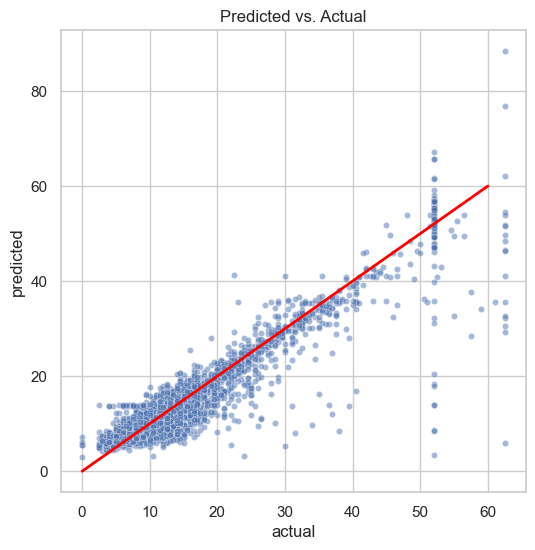

In [285]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize = (6, 6))
sns.set(style ='whitegrid')
sns.scatterplot(x ='actual', y ='predicted', data = results, s = 20, alpha = 0.5, ax = ax)

# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Predicted vs. Actual');

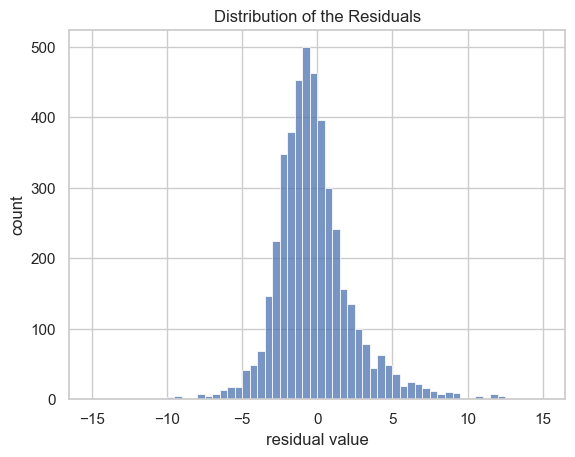

In [289]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins = np.arange(-15,15.5,0.5))
plt.title('Distribution of the Residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [290]:
# Calculate the residual mean
results['residual'].mean()

-0.01544262152868096

Observation:
- The distribution of the residuals is approximately normal and has a mean of -0.015
- The residuals represent the variance in the outcome variable that is not explained by the model
- If the residuals are normally distributed and centered around zero, it indicates that the model is capturing the underlying patterns in the data well, and the model's assumptions are met

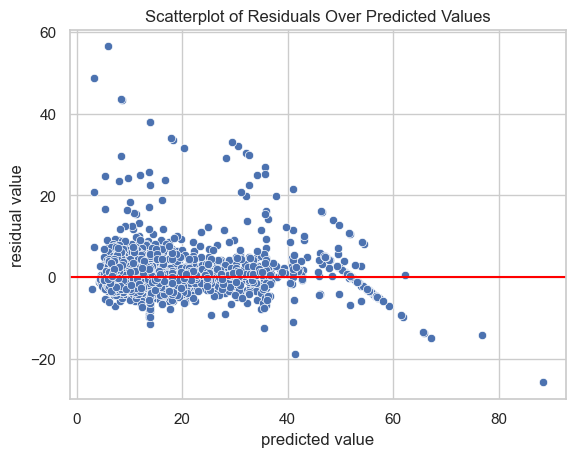

In [292]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x = 'predicted', y = 'residual', data = results)
plt.axhline(0, c = 'red')
plt.title('Scatterplot of Residuals Over Predicted Values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

Observation:
- The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner
- This might be due to the imputed maximum of \\$62.50 and the flat rate of \\$52 for JFK airport trips

In [294]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns = X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030825,7.133867,2.812115,0.110233,-0.054373


The coefficients reveal that mean_distance was the feature with the greatest weight in the model's final prediction with the value of 7.133867. Since `StandardScaler()` is used in this case, the interpretation of this coefficient is:

`controlling for other variables, for every +1 change in standard deviation, the fare amount would increase by a mean of $7.13`.

In [295]:
# Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.574812975256436
1.9955916713344308


More intuitive interpretation:

`for every 3.57 miles traveled, the fare increased by a mean of $7.13`

or

`for every 1 mile traveled, the fare increased by a mean of $2.00`

4. Conclusion and Notes
    - When the `mean_distance` and `mean_duration` columns were computed, the means were calculated from the entire dataset. This is known as ***data leakage***. To avoid this, seperated the data into training and testing data at the beginning before doing the feature engineering. Further steps would be required after that.
    - Remove the fare amount for `RatecodeID = 2` which involves the fix rate trips. This is unnecessary as the fare amount would be the same and does not need any prediction

#### **05_Build a Machine Learning Model** <a id='section_05'></a>

1. EDA & checking model assumption
    - Outliers and extreme data values can significantly impact linear regression equations
    - After visualizing data, some of the outliers have to be either dropped, substituted or completely removed
    - Feature engineering to create a new useful variable as predictor variable